In [1]:
# import required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data into dataset
data=pd.read_csv(r"C:\Users\Sanchit Dakle\OneDrive\Desktop\Excelar\Cardiotocographic.csv")
data

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2121   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2126 rows x 14 columns]

In [3]:
#find the missing value
data.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [4]:
# handle the missing value
data.fillna(data.mean(),inplace=True)

In [5]:
# handle missing value there are no missing value
data.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [6]:
# identify the numerical columns
numerical_column=data.select_dtypes(include=['number']).columns
numerical_column

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [7]:
import numpy as np

# Example: Z-score method
from scipy import stats

z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
data = data[(z_scores < 3).all(axis=1)]


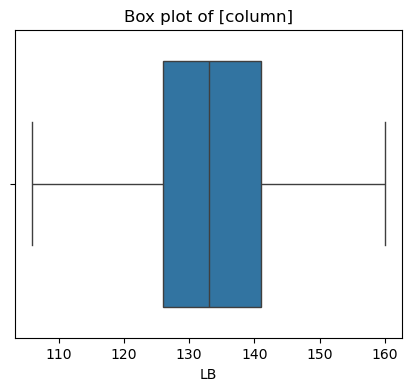

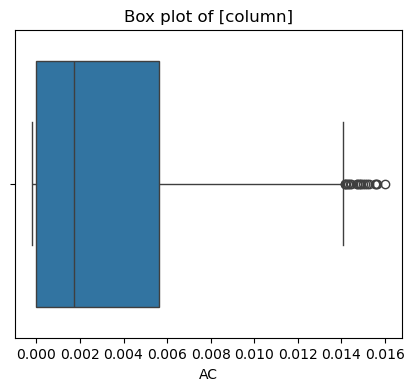

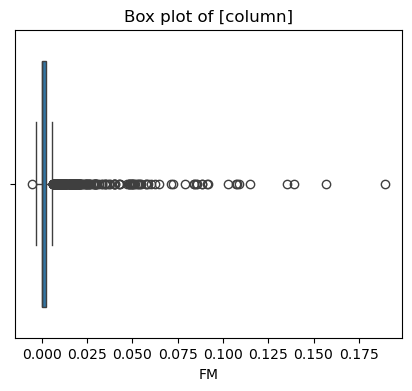

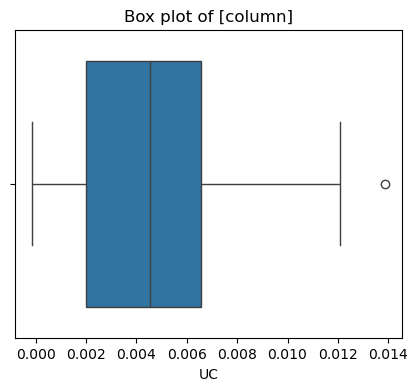

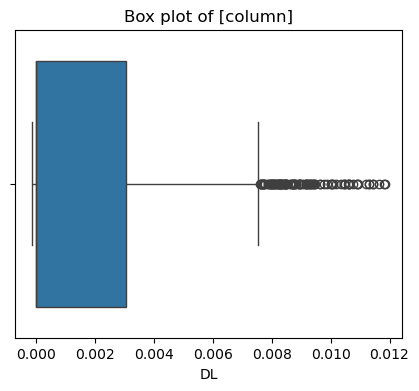

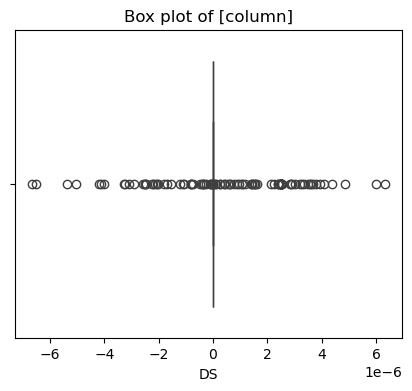

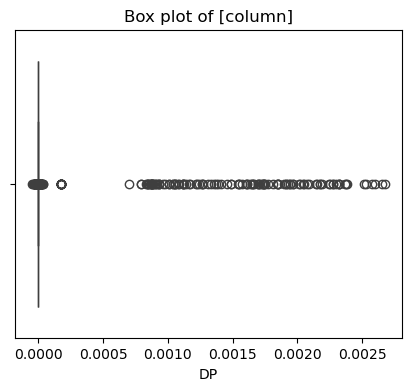

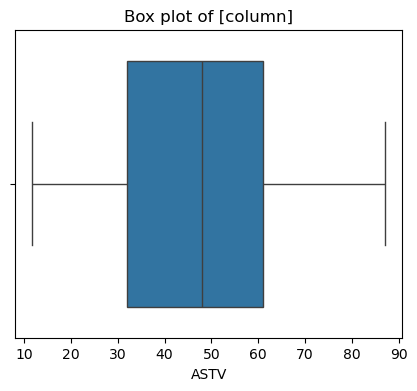

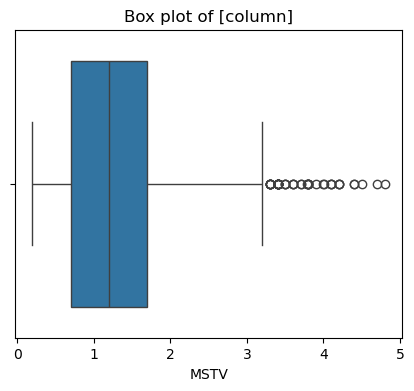

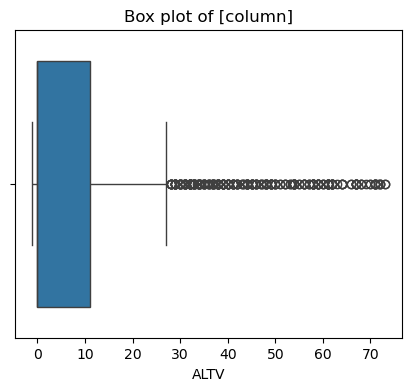

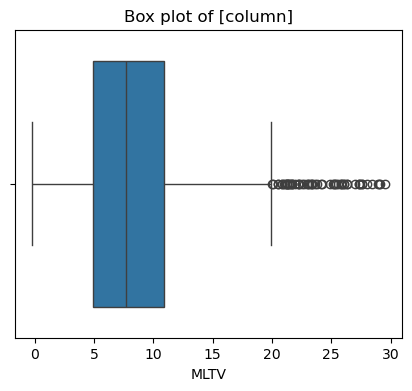

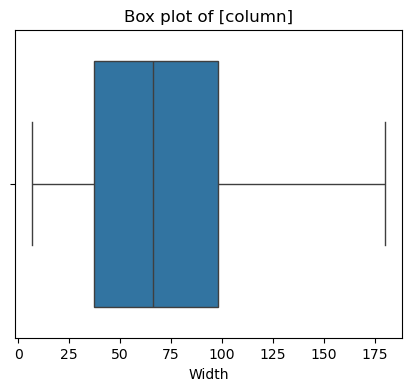

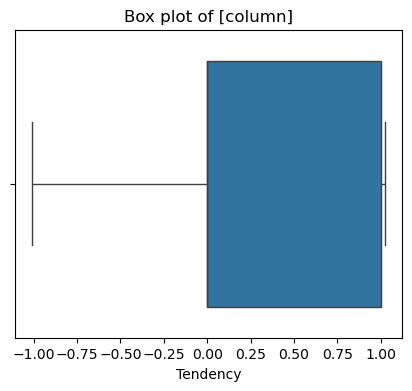

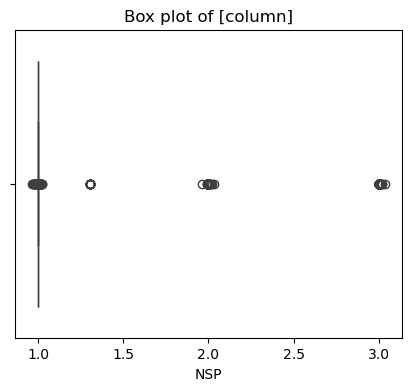

In [8]:
# boxplot is used to detect the outlayers it is used to visulization
for column in numerical_column:
    plt.figure(figsize=(5,4))
    sns.boxplot(x=data[column])
    plt.title(f'Box plot of [column]')
    plt.show()


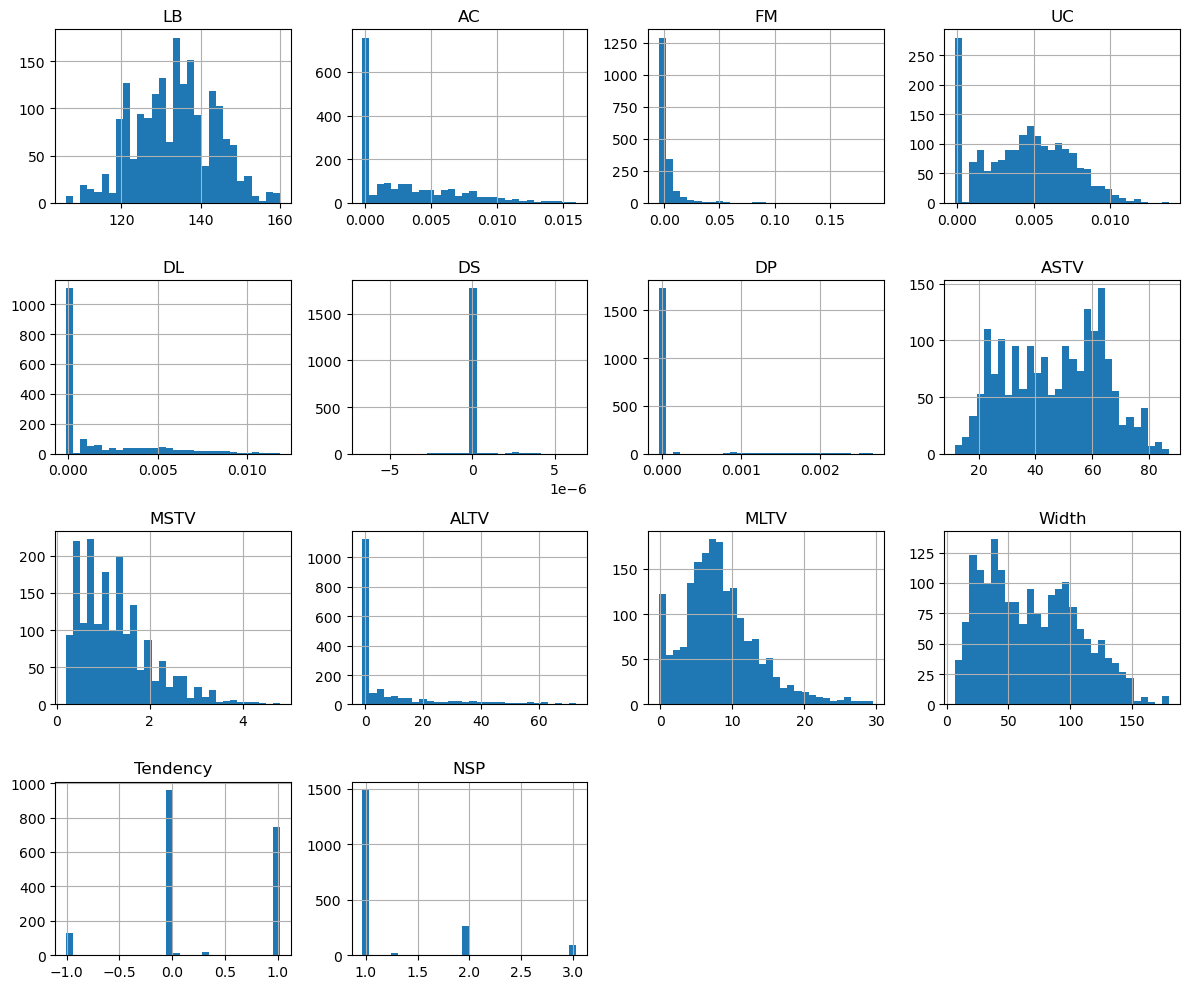

In [9]:
# Histogram
data.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()


# Statistical Summary:

In [11]:
# data.describe show the summery of data like mean,median,mode
data.describe()

LB           AC           FM           UC           DL  \
count  1869.000000  1869.000000  1869.000000  1869.000000  1869.000000   
mean    133.306955     0.003194     0.004240     0.004391     0.001732   
std       9.899631     0.003767     0.013554     0.002904     0.002705   
min     106.000000    -0.000185    -0.005106    -0.000132    -0.000124   
25%     126.000000     0.000000     0.000000     0.002002     0.000000   
50%     133.000000     0.001733     0.000000     0.004556     0.000000   
75%     141.000000     0.005650     0.002358     0.006579     0.003036   
max     160.000000     0.016000     0.189320     0.013861     0.011837   

                 DS           DP         ASTV         MSTV         ALTV  \
count  1.869000e+03  1869.000000  1869.000000  1869.000000  1869.000000   
mean   3.736781e-08     0.000102    46.870868     1.283173     9.193894   
std    6.367633e-07     0.000404    16.834525     0.778099    16.574763   
min   -6.650000e-06    -0.000045    11.799846     0.200000    -1.043619   
25%    0.000000e+00     0.000000    32.000000     0.700000     0.000000   
50%    0.000000e+00     0.000000    48.000000     1.200000     0.000000   
75%    0.000000e+00     0.000000    61.000000     1.700000    11.000000   
max    6.323448e-06     0.002674    87.000000     4.800000    73.000000   

              MLTV        Width     Tendency          NSP  
count  1869.000000  1869.000000  1869.000000  1869.000000  
mean      8.329351    68.930613     0.332264     1.244957  
std       5.226398    37.614026     0.600830     0.528625  
min      -0.200788     7.000000    -1.006614     0.967075  
25%       4.900000    37.000000     0.000000     1.000000  
50%       7.700000    66.000000     0.000000     1.000000  
75%      10.900000    98.000000     1.000000     1.000000  
max      29.500000   180.000000     1.023635     3.034545

In [12]:
# treat the outlayers 
for column in numerical_column:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    summary = pd.DataFrame(index=['IQR'], columns=numerical_column)
    summary.loc['IQR'] = IQR
    

In [13]:
summary

LB   AC   FM   UC   DL   DS   DP ASTV MSTV ALTV MLTV Width Tendency  NSP
IQR  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0      0.0  0.0

# Data Visualization:

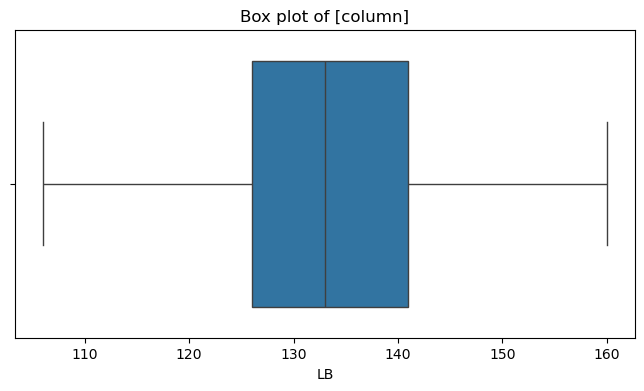

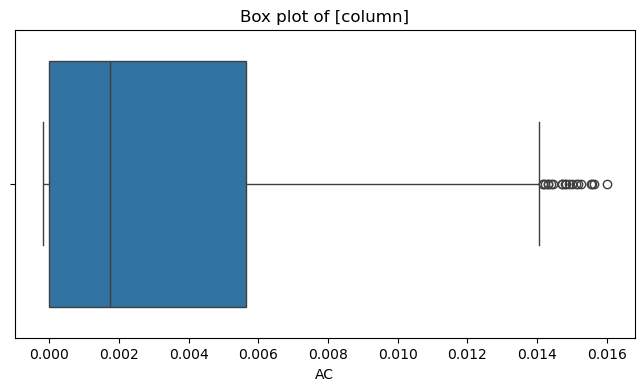

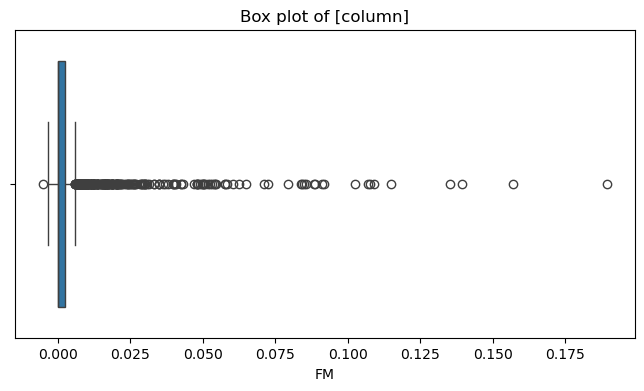

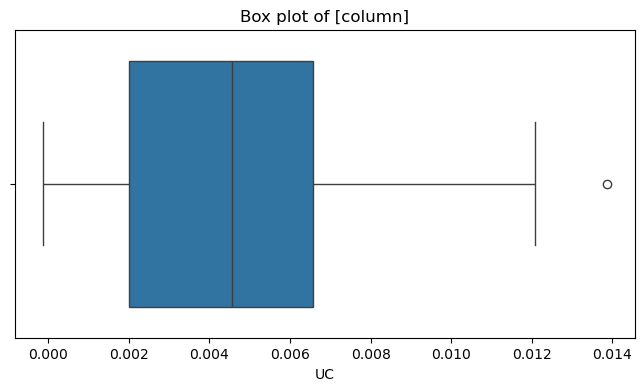

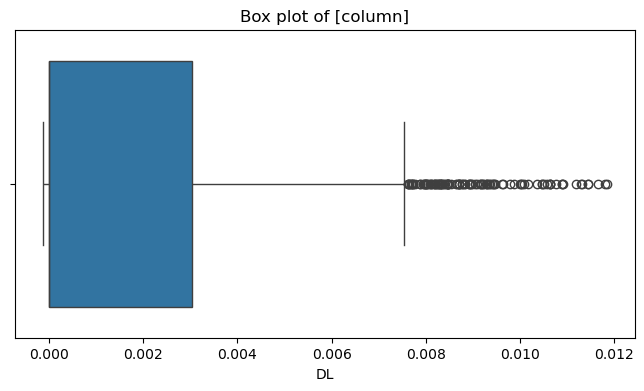

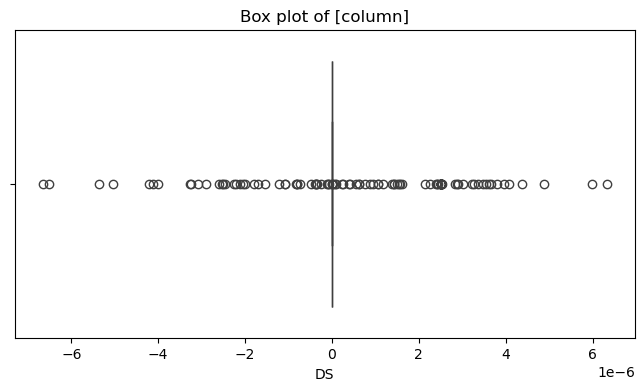

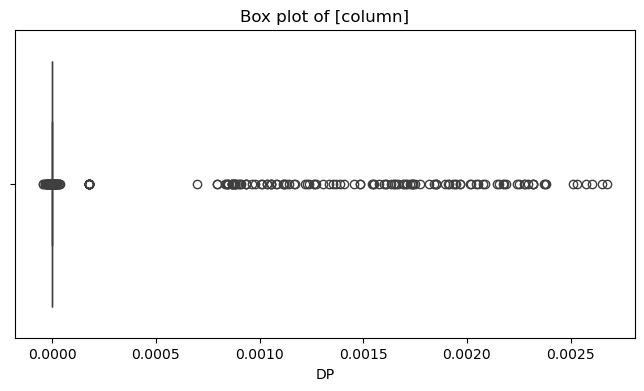

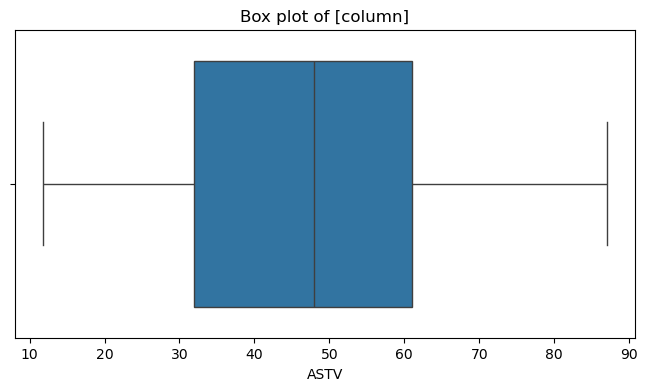

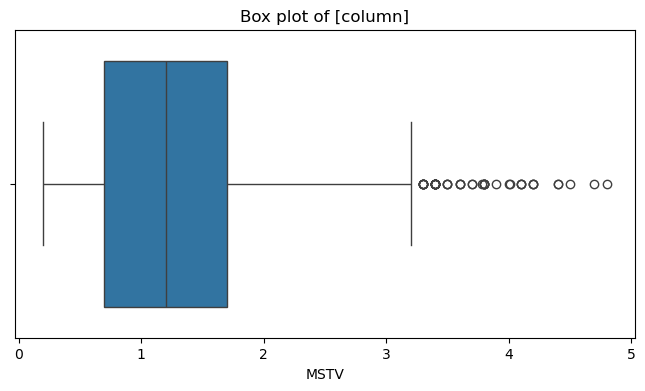

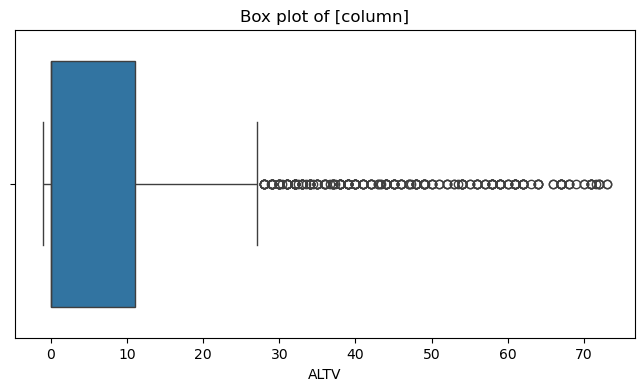

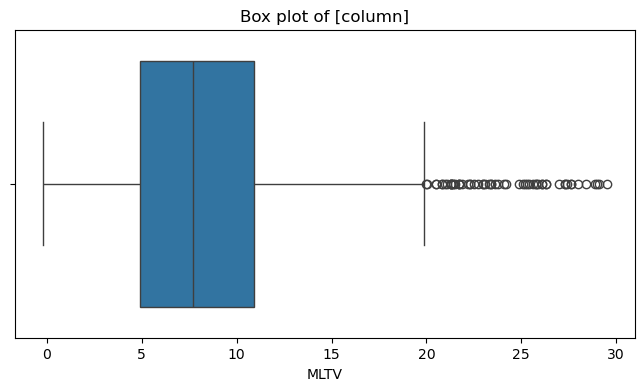

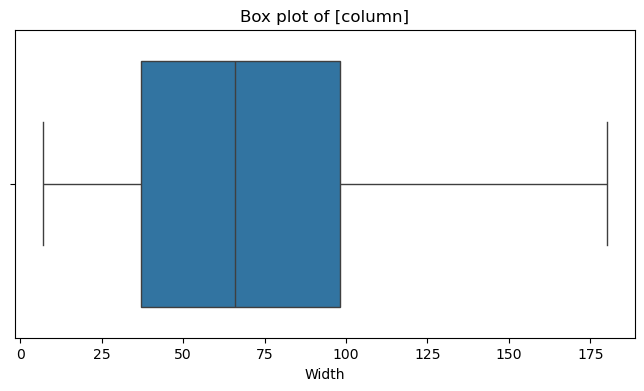

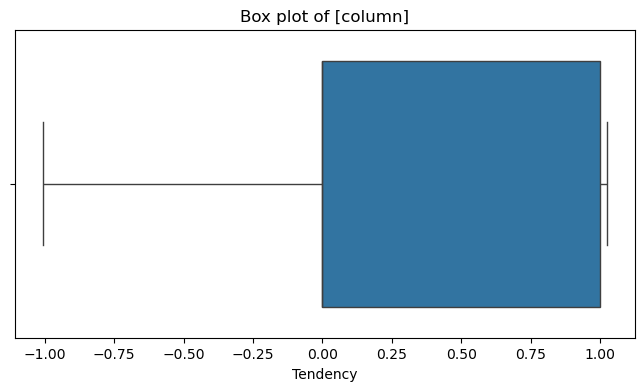

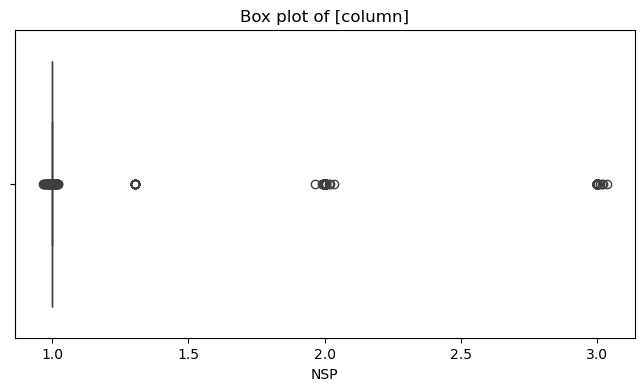

In [15]:
# data visulization using bixplot show the outlayers
for column in numerical_column:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[column])
    plt.title(f'Box plot of [column]')
    plt.show()

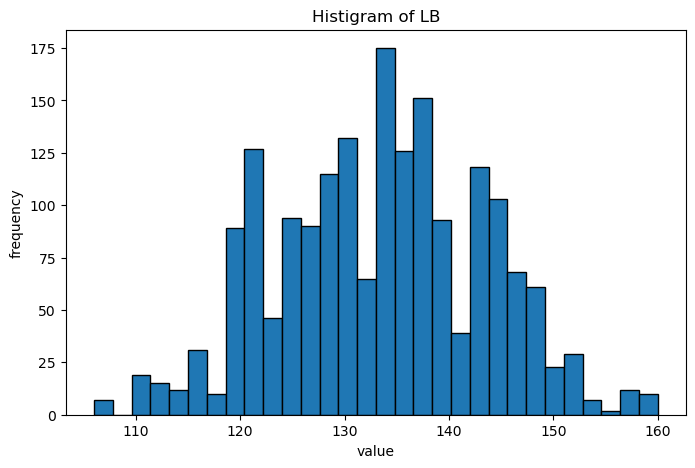

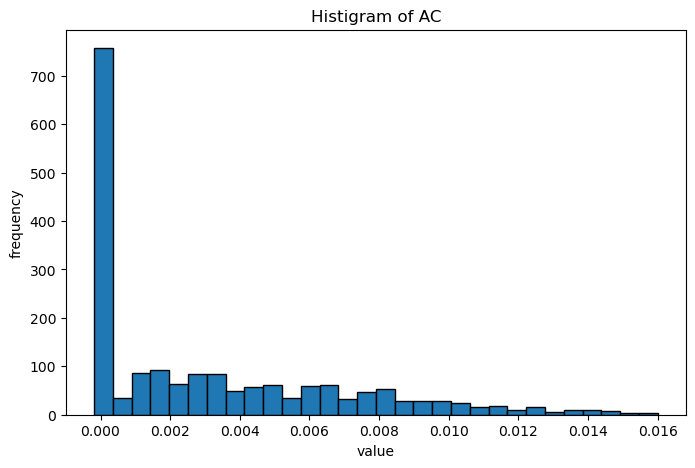

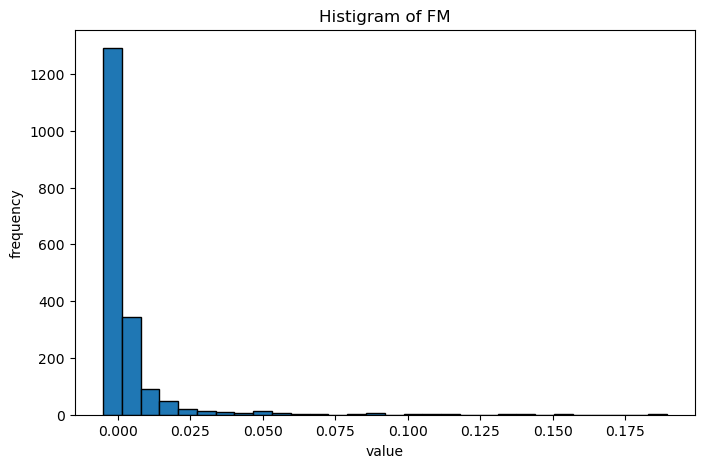

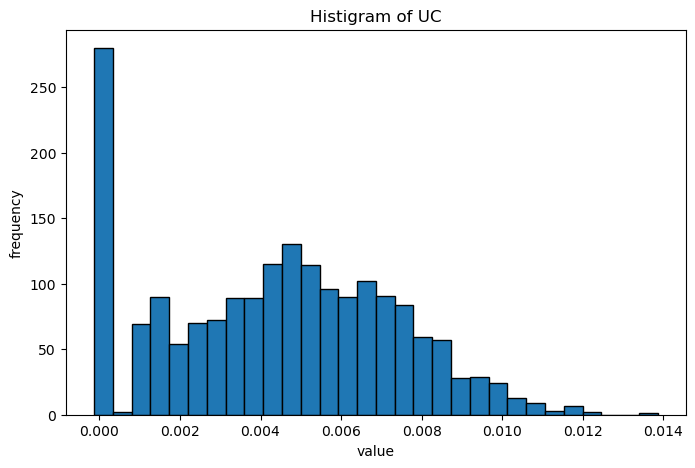

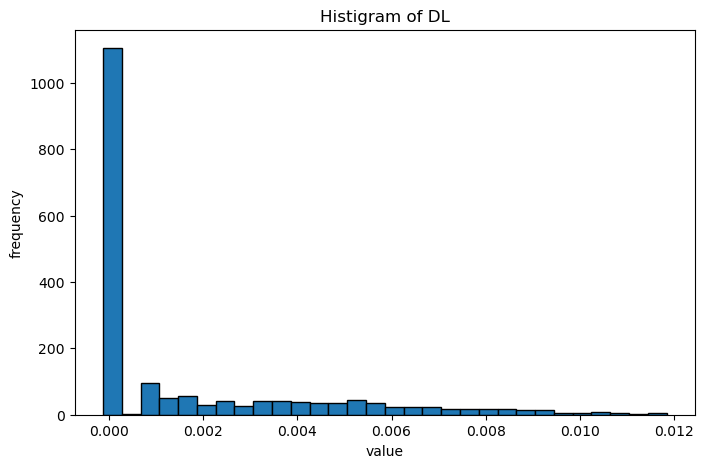

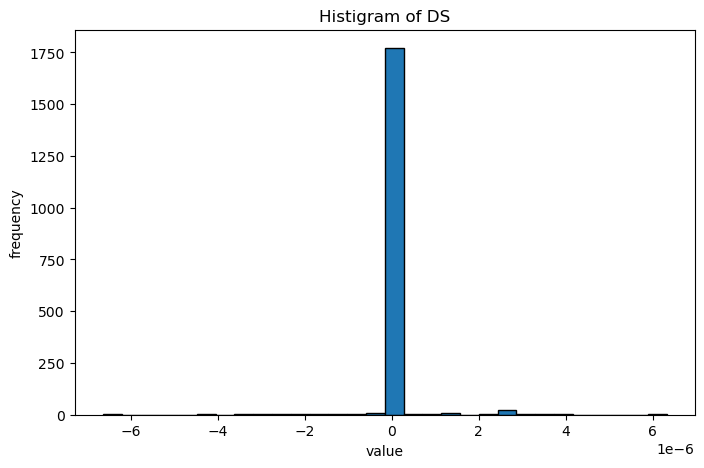

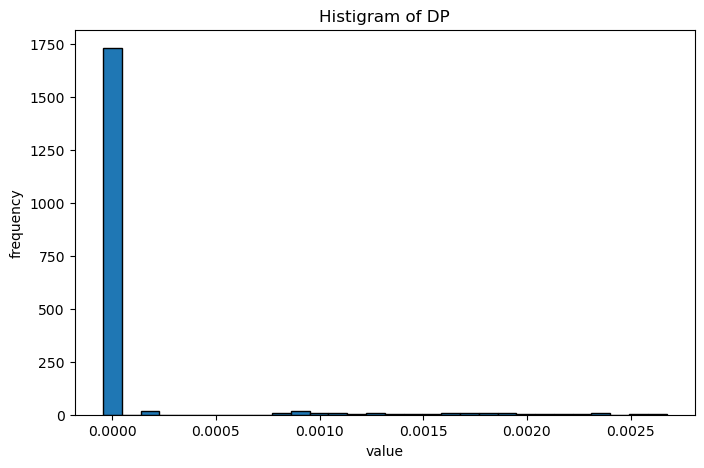

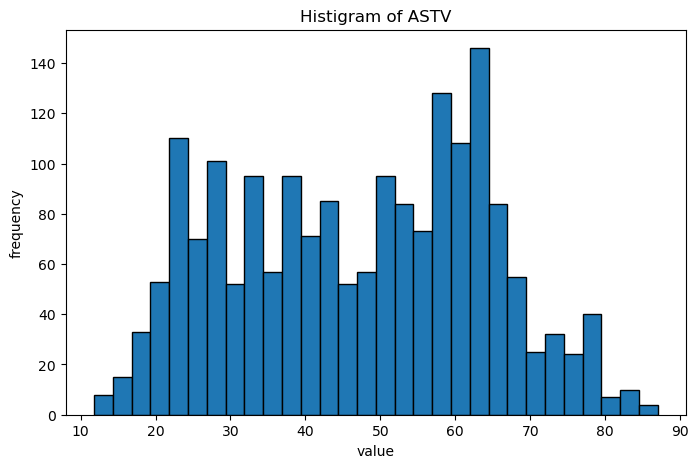

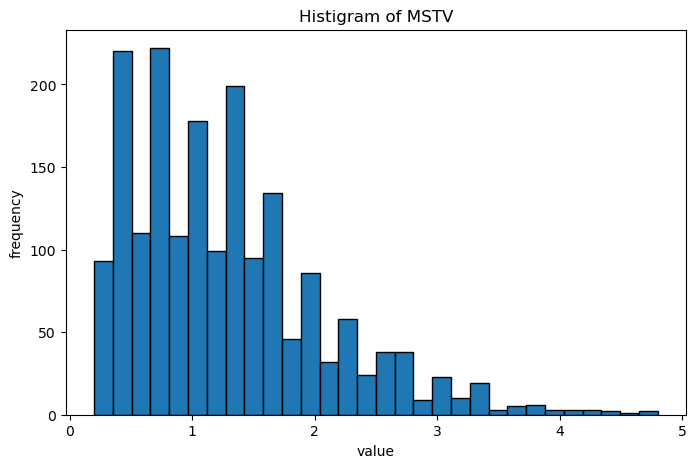

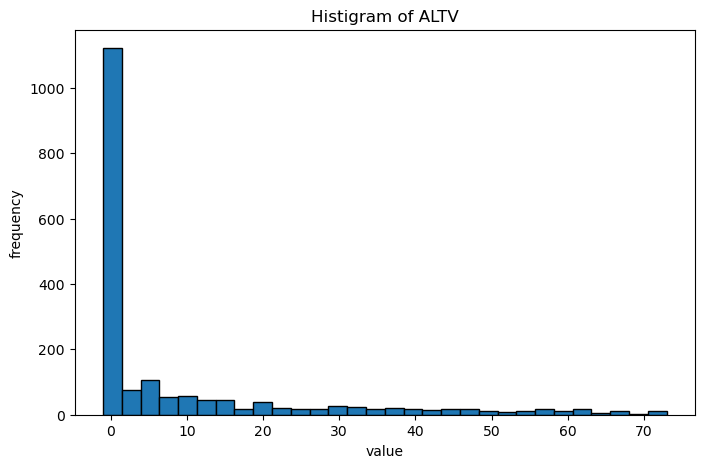

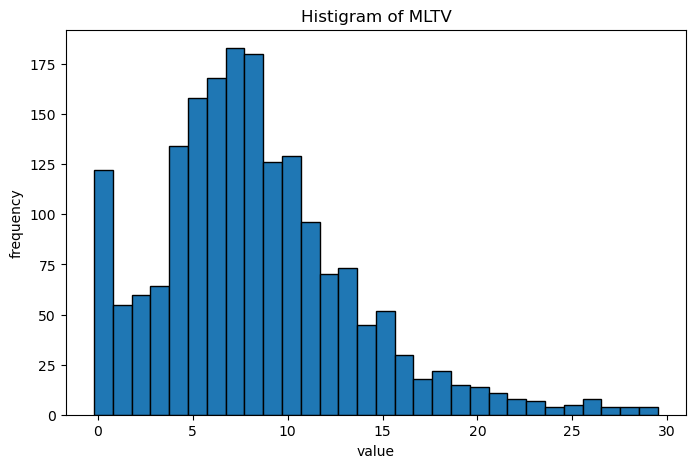

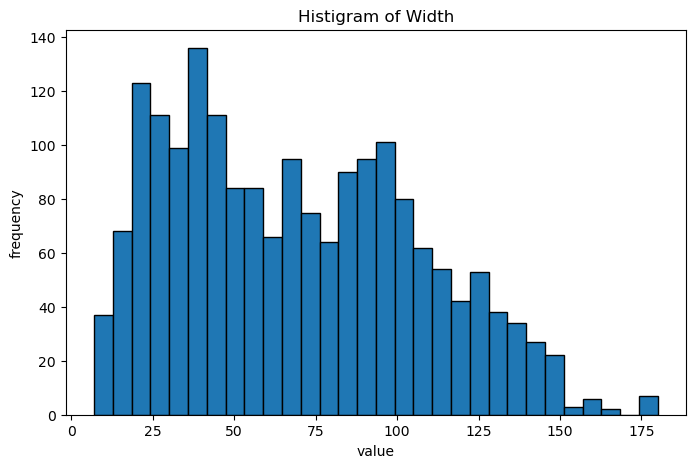

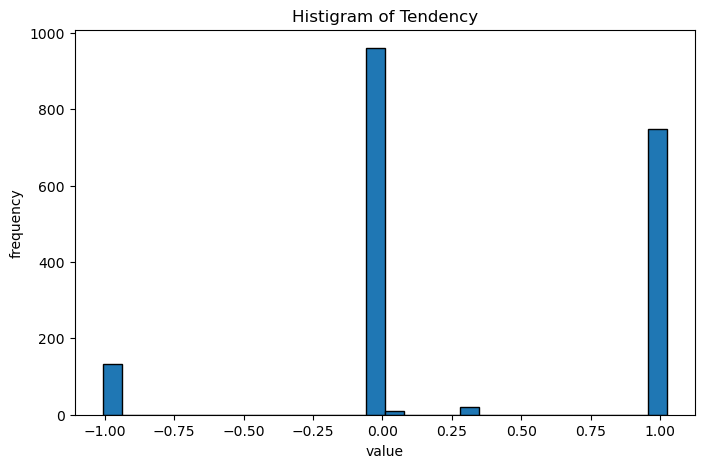

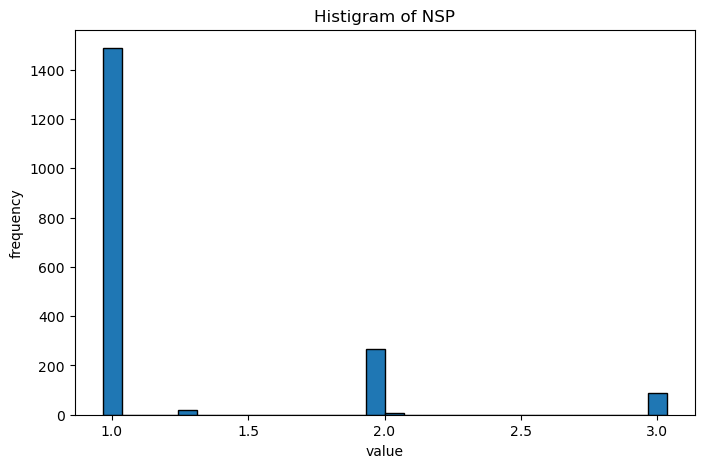

In [16]:
# Histigram plot use to visulize the data
for column in numerical_column:
    plt.figure(figsize=(8,5))
    plt.hist(data[column],bins=30,edgecolor='black')
    plt.title(f'Histigram of {column}')
    plt.xlabel('value')
    plt.ylabel('frequency')

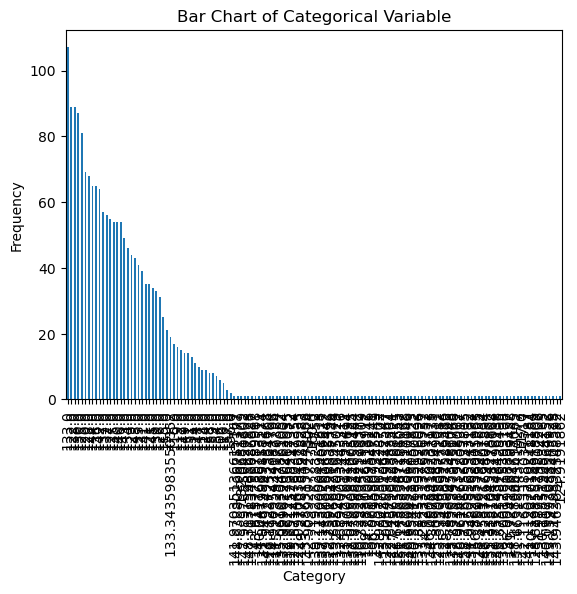

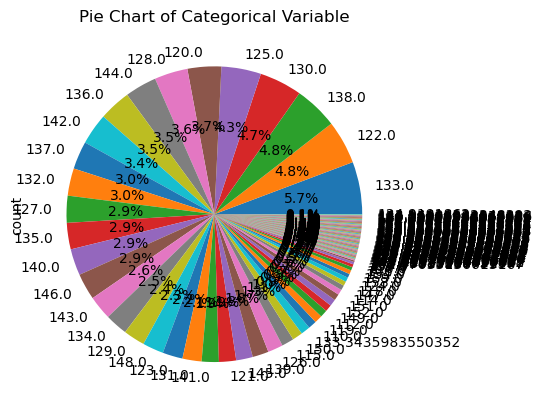

In [17]:
# Bar Chart for categorical variables
data['LB'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Bar Chart of Categorical Variable')
plt.show()

# Pie Chart
data['LB'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Categorical Variable')
plt.show()

In [18]:
# identify the categorical columns
categorical_column=data.select_dtypes(include=['object']).columns


In [19]:
categorical_column


Index([], dtype='object')

<Axes: >

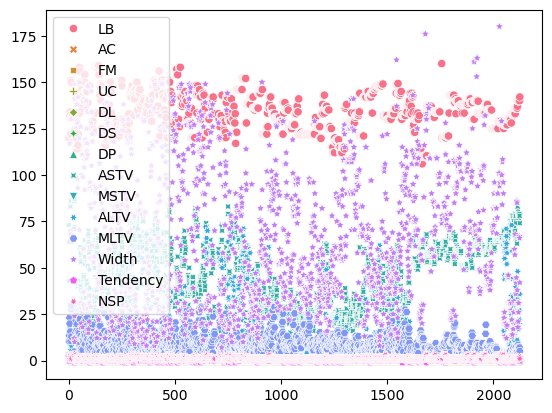

In [20]:
# scatter plot also called as wisker plot
sns.scatterplot(data)


In [21]:
# find the correlation
correlation=data.corr(numeric_only=True)

<Axes: >

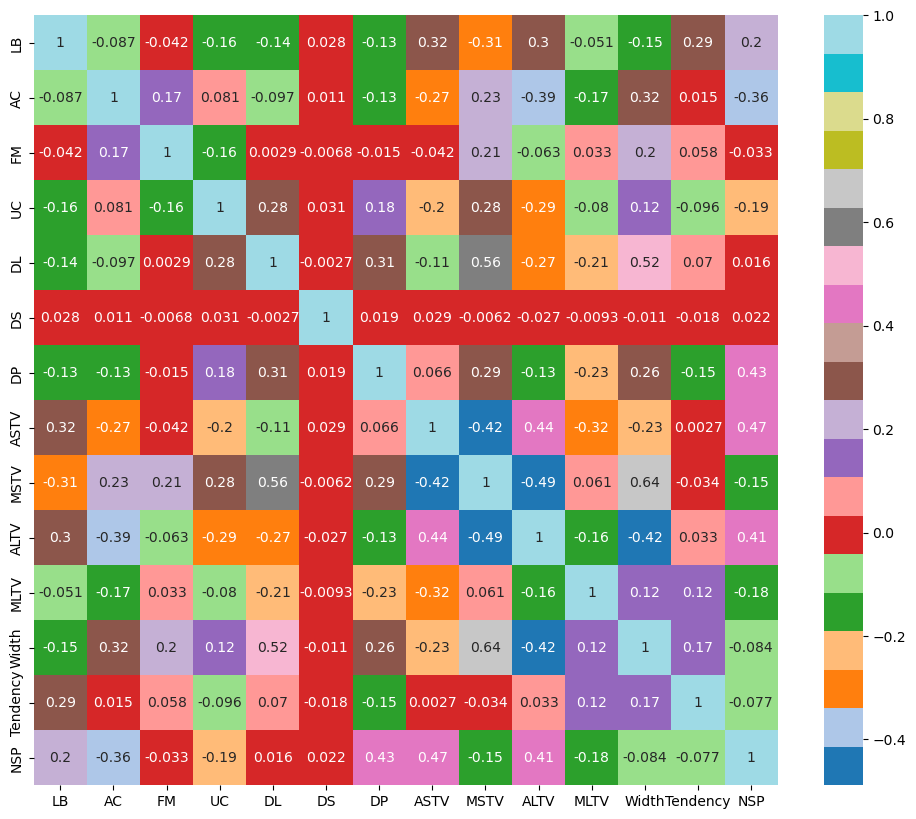

In [22]:
# heatmap used to visulize the numeric relationship between two categorical variable
plt.figure(figsize=(12, 10))
sns.heatmap(correlation,annot=True,cmap='tab20')

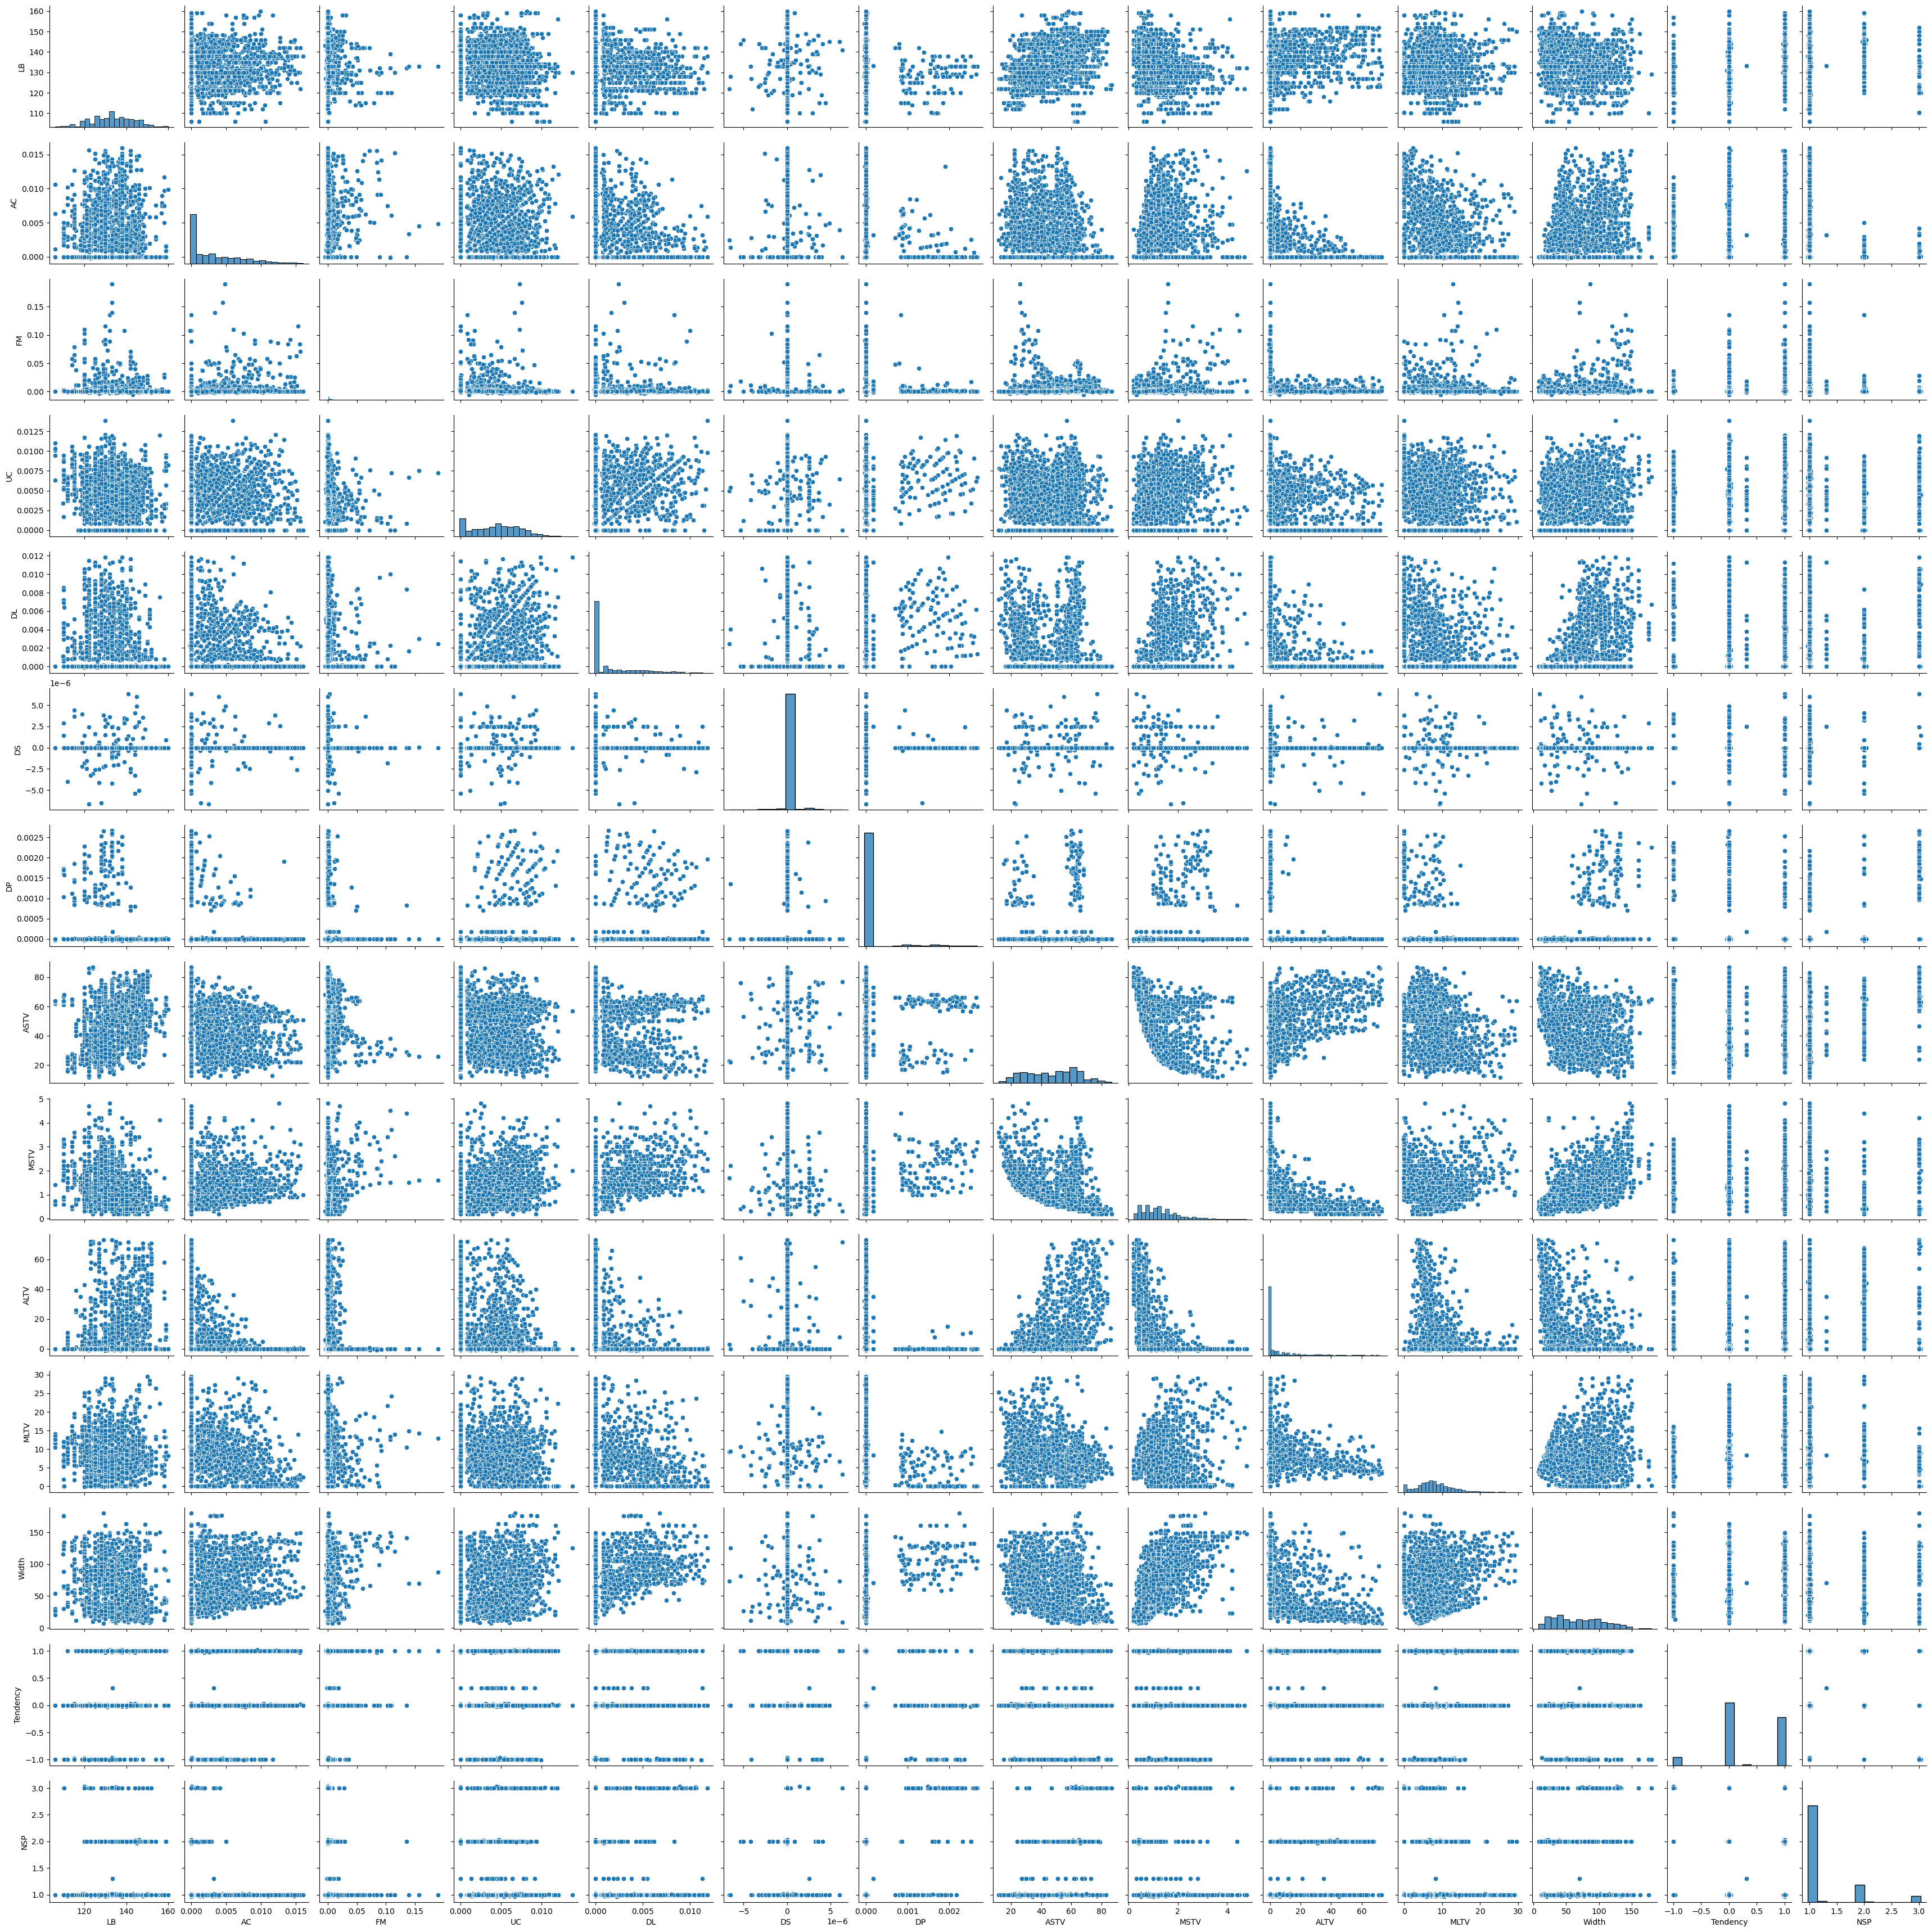

In [23]:
# pairplot show the relationship between variables
sns.pairplot(data)

<Axes: >

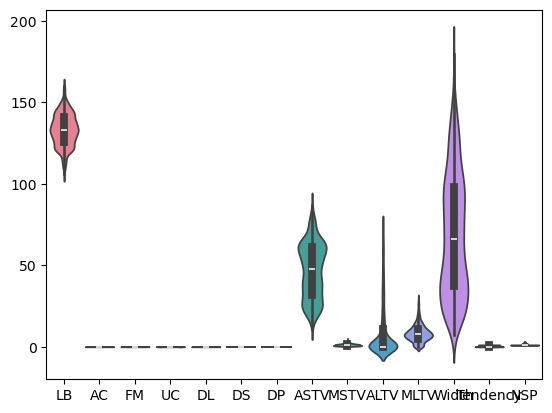

In [24]:
sns.violinplot(data)

# 4.Pattern Recognition and Insights

In [26]:
correlation=data.corr()

In [27]:
print(correlation)

                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.086515 -0.042026 -0.160873 -0.142814  0.027850   
AC       -0.086515  1.000000  0.169733  0.080760 -0.097089  0.010686   
FM       -0.042026  0.169733  1.000000 -0.158045  0.002855 -0.006777   
UC       -0.160873  0.080760 -0.158045  1.000000  0.276618  0.030565   
DL       -0.142814 -0.097089  0.002855  0.276618  1.000000 -0.002720   
DS        0.027850  0.010686 -0.006777  0.030565 -0.002720  1.000000   
DP       -0.129591 -0.126544 -0.015265  0.177230  0.310766  0.019256   
ASTV      0.317221 -0.274809 -0.041502 -0.203468 -0.108810  0.028931   
MSTV     -0.310561  0.231367  0.206354  0.279822  0.563550 -0.006152   
ALTV      0.303701 -0.390056 -0.062675 -0.285765 -0.271666 -0.026933   
MLTV     -0.050824 -0.167508  0.033019 -0.079630 -0.212914 -0.009254   
Width    -0.145620  0.315573  0.196064  0.118759  0.517190 -0.011315   
Tendency  0.294301  0.014916  0.057996 -0.096481  0.070314 -0.01

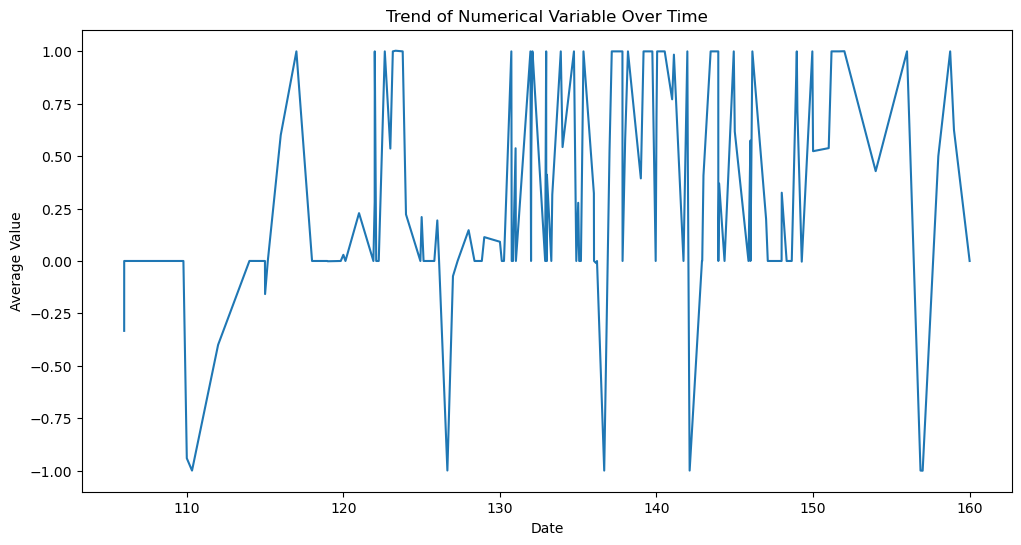

In [28]:
# Convert date column to datetime if needed

# Plot trends over time
plt.figure(figsize=(12, 6))
data.groupby('LB')['Tendency'].mean().plot()
plt.title('Trend of Numerical Variable Over Time')
plt.xlabel('Date')
plt.ylabel('Average Value')
plt.show()